# NAND gate

In [1]:
from graphviz import Digraph
from micrograd import Value
import matplotlib.pyplot as plt
from nn import Neuron, Layer, MLP

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [2]:
# initialize a model 
n = MLP(2, [2, 1]) # 2-layer neural network
print(n)
print("number of parameters", len(n.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2)], Layer of [LinearNeuron(2)]]
number of parameters 9


In [3]:
xs = [
  [0.0, 0.0],
  [1.0, 0.0],
  [0.0, 1.0],
  [1.0, 1.0],
]
ys = [1.0, 1.0, 1.0, 0.0] # desired targets



In [38]:
for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)
  

0 0.0006730096696894814
1 0.0005620213389694526
2 0.00046906897748931313
3 0.000391285807760641
4 0.0003262453376132513
5 0.0002718974441803198
6 0.0002265128373070773
7 0.00018863502180192305
8 0.0001570389290218571
9 0.00013069540968587917
10 0.00010874087550769365
11 9.04513962581846e-05
12 7.522068674079332e-05
13 6.254140444735627e-05
14 5.198934530795955e-05
15 4.321004703152864e-05
16 3.590754186603947e-05
17 2.98348151443066e-05
18 2.47858791883295e-05
19 2.0589011519695322e-05


In [39]:
print(n)

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2)], Layer of [LinearNeuron(2)]]


In [40]:
n.parameters


<bound method MLP.parameters of MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2)], Layer of [LinearNeuron(2)]]>

In [41]:
ypred

[Value(data=1.0028811235874358),
 Value(data=0.9980736789600078),
 Value(data=0.9980736791442314),
 Value(data=0.00220606291957659)]

In [42]:
n.layers

[Layer of [ReLUNeuron(2), ReLUNeuron(2)], Layer of [LinearNeuron(2)]]

In [43]:
n.layers[1].neurons[0].w[0].data

-1.273354222476375

In [44]:
ypred = [n(x) for x in xs]

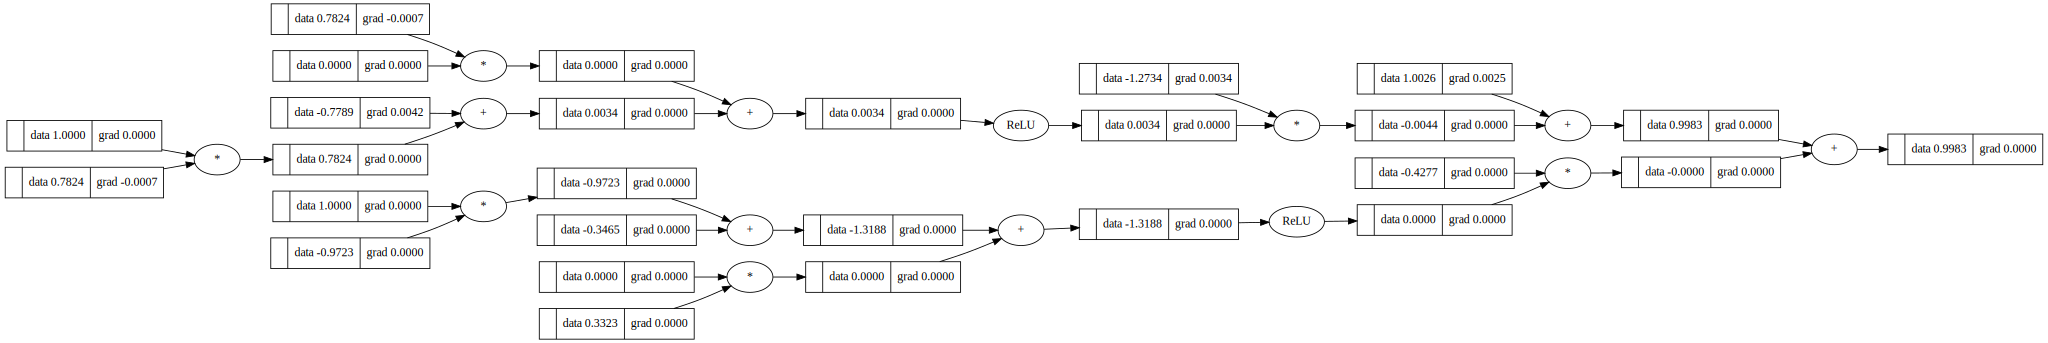

In [46]:
draw_dot(n([1.0,0.0]))